## Initial Setup, EDA, Cleaning



loading dataset and intro stats

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_billboard_data(file):
    df = pd.read_csv(file)
    return df

df = load_billboard_data('Hot 100.csv')
# https://www.reddit.com/r/billboard/comments/15vs4i4/historical_billboard_charts/


In [ ]:
print(len(df))

343195


In [ ]:
print(df.dtypes)

chart_position         int64
chart_date            object
song                  object
performer             object
song_id               object
instance             float64
time_on_chart          int64
consecutive_weeks    float64
previous_week        float64
peak_position          int64
worst_position         int64
chart_debut           object
chart_url             object
dtype: object


In [ ]:
print(df.isnull().sum())

chart_position           0
chart_date               0
song                     0
performer                0
song_id                  0
instance                 0
time_on_chart            0
consecutive_weeks    34489
previous_week        34489
peak_position            0
worst_position           0
chart_debut              0
chart_url                0
dtype: int64


In [ ]:
df.head()

,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,1,NaN,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,2,1.0,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
2,68,1990-05-19,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,3,2.0,78.0,68,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
3,60,1990-05-26,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,4,3.0,68.0,60,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
4,58,1990-06-02,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,5,4.0,60.0,58,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...


In [ ]:
# drop columns and see the oldest songs in the df
df = df[['chart_date', 'song', 'performer', 'instance', 'time_on_chart']]
df = df.sort_values('chart_date', ascending=True)
df = df.reset_index(drop=True)
df.head(20)

,chart_date,song,performer,instance,time_on_chart
0,1958-08-02,She Was Only Seventeen (He Was One Year More),Marty Robbins,1.0,1
1,1958-08-02,Stupid Cupid,Connie Francis,1.0,1
2,1958-08-02,The Freeze,Tony And Joe,1.0,1
3,1958-08-02,Patricia,Perez Prado And His Orchestra,1.0,1
4,1958-08-02,My True Love,Jack Scott,1.0,1
5,1958-08-02,When,Kalin Twins,1.0,1
6,1958-08-02,Stay,The Ames Brothers,1.0,1
7,1958-08-02,Leroy,Jack Scott,1.0,1
8,1958-08-02,Willie And The Hand Jive,The Johnny Otis Show,1.0,1
9,1958-08-02,I Believe In You,Robert & Johnny,1.0,1


In [ ]:
# drop all observations post 2005
df['chart_date'] = pd.to_datetime(df['chart_date'])
df = df[df['chart_date'].dt.year >= 2005]
df.head(20)

,chart_date,song,performer,instance,time_on_chart
242195,2005-01-01,Baby It's You,JoJo Featuring Bow Wow,1.0,13
242196,2005-01-01,A Rose By Any Other Name,Teena Marie Featuring Gerald Levert,1.0,1
242197,2005-01-01,Breakaway,Kelly Clarkson,1.0,19
242198,2005-01-01,Mockingbird,Eminem,1.0,1
242199,2005-01-01,My Boo,Usher And Alicia Keys,1.0,17
242200,2005-01-01,Holy Water,Big & Rich,1.0,1
242201,2005-01-01,When I Think About Cheatin',Gretchen Wilson,1.0,4
242202,2005-01-01,Go D.J.,Lil Wayne,1.0,14
242203,2005-01-01,Vitamin R (Leading Us Along),Chevelle,1.0,7
242204,2005-01-01,Party For Two,Shania Twain With Billy Currington Or Mark McG...,1.0,9


In [ ]:
# get rid of featuring artists, we only want the first one
def clean_artists(artist_string):
  if 'feat' in artist_string:
    artist_string = artist_string.split('feat')[0].strip()
  if "Featuring" in artist_string:
    artist_string = artist_string.split("Featuring")[0].strip()
  if "," in artist_string:
    artist_string = artist_string.split(",")[0].strip()
  if "&" in artist_string:
    artist_string = artist_string.split("&")[0].strip()

  return artist_string

df['performer'] = df['performer'].apply(clean_artists)

#### Spotify API, LastFM API, hardcoding to get all the song lengths into a new dataframe



In [ ]:
# setup for Spotify API
!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'cd69a9263f86415781caec893d2f6e92'
client_secret = '17922e1016644aa791164f2912ad4fc6'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Setup for LastFM API
!pip install pylast
import pylast

API_KEY = "ff5180381241783ff3f3694f70d42d8e"
API_SECRET = "9d6b6aeb4f65c202a0422dd4d0abe9d5"
username = "varunpav"
password_hash = pylast.md5("Zebra421!")

network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET,
                               username=username, password_hash=password_hash)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
# use spotify API to find length
def get_song_length(artist, song_title):
  try:
    results = sp.search(q=f"artist:{artist} track:{song_title}", type="track")
    if results['tracks']['items']:
      song_length = results['tracks']['items'][0]['duration_ms']
      return song_length
    else:
      return None
  except Exception as e:
    print(f"Error retrieving song length: {e}")
    return None

In [ ]:
# Group by 'song' and 'performer' to get the max instance and the earliest chart date
unique_df = df.groupby(['song', 'performer']).agg({
    'instance': 'max',               # Get the max instance
    'chart_date': 'min',             # Get the earliest chart date
    'time_on_chart': 'max'           # Keep the maximum time_on_chart (weeks on chart)
}).reset_index()

# Reset the index to clean up
unique_df = unique_df.reset_index(drop=True)

# Print the length of unique_df
print(len(unique_df))

9285


In [ ]:
# total songs
print(len(df))

101000


Takes approx 10 mins to run

In [ ]:
# Apply the spotify API to fill in lengths
unique_df['song_length_ms'] = None

for index, row in unique_df.iterrows():
  song_title = row['song']
  artist = row['performer']
  song_length = get_song_length(artist, song_title)
  unique_df.at[index, 'song_length_ms'] = song_length


Error retrieving song length: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


In [ ]:
### Testing for a specific song using spotify API
song_length = get_song_length("J. Cole", "7 Minute Drill")
if song_length:
  print(f"Song length: {song_length} ms")
else:
  print("Song not found.")

In [ ]:
# How many songs with no length?
null_song_lengths = unique_df[unique_df['song_length_ms'].isnull()]
print(len(null_song_lengths))

5309


In [ ]:
# get rid of some common things to reduce this list
def clean_artists_further(artist_string):
  if 'X' in artist_string:
    artist_string = artist_string.replace('X', '').strip()
  if 'x' in artist_string:
    artist_string = artist_string.replace('x', '').strip()
  if 'With' in artist_string:
    artist_string = artist_string.split('With')[0].strip()
  if 'Feauring' in artist_string:
    artist_string = artist_string.split('Feauring')[0].strip()
  if ':' in artist_string:
    artist_string = artist_string.split(':')[0].strip()
  if 'Feat.' in artist_string:
    artist_string = artist_string.split('Feat.')[0].strip()
  if artist_string is None:
    return None
  return artist_string

# sometimes it doesn't clean on the first pass??? idk but 5 just in case
null_song_lengths.loc[:, 'performer'] = null_song_lengths['performer'].apply(clean_artists_further)

In [ ]:
# fill it in again using spotify API
for index, row in null_song_lengths.iterrows():
  song_title = row['song']
  artist = row['performer']
  song_length = get_song_length(artist, song_title)
  unique_df.at[index, 'song_length_ms'] = song_length

In [ ]:
# LastFM method to fill in length (in ms)
def get_song_length_lastfm(artist, song_title):
  try:
    track = network.get_track(artist, song_title)
    duration = track.get_duration()
    if duration:
      print('found')
      return duration
    else:
      return None
  except Exception as e:
    print(f"Error retrieving song length from Last.fm: {e}")
    return None

In [ ]:
# apply LastFM
for index, row in null_song_lengths.iterrows():
  song_title = row['song']
  artist = row['performer']

  if unique_df.at[index, 'song_length_ms'] is None:  # Only attempt if still null
    song_length = get_song_length_lastfm(artist, song_title)
    if song_length:
      unique_df.at[index, 'song_length_ms'] = song_length

In [ ]:
# How many null values now?d
null_song_lengths = unique_df[unique_df['song_length_ms'].isnull()]
print(len(null_song_lengths))

In [ ]:
# Thank you J.Cole offseason and profanity
print(len(null_song_lengths))
null_song_lengths.head(36)

In [ ]:
unique_df.head(20)

In [ ]:
# hardcoding the rest of the values the API couldn't find

null_song_lengths_dict = {
    "100.mil'": 243000,
    "95.south": 316000,
    "All Dat": 167000,
    "All These N**gas": 135000,
    "Blue Note$ II": 217000,
    "Call Me Everyday": 232000,
    "Constant Bulls**t": 197000,
    "Don't Play With It": 138000,
    "Dope N****z": 197000,
    "F**k The Industry Pt. 2": 175000,
    "Ganja Burns": 294000,
    "Good (Don't Die)": 192000,
    "I'm Dat N***a": 271000,
    "It's Goin' Down": 252000,
    "Jerika": 190000,
    "Kream": 166000,
    "Love Make The World Go Round": 273000,
    "Me, Myself & I": 251000,
    "Oklahoma Smoke Show": 211000,
    "One Too Many": 203000,
    "Pick Up The Phone": 252000,
    "Pills And Automobiles": 293000,
    "Pop Ur Sht": 193000,
    "Quema": 150000,
    "Ran$om": 131000,
    "Stop Snitching": 149000,
    "Switch A N*gga Out": 177000,
    "The Scotts": 165000,
    "This Summer's Gonna Hurt...": 224000,
    "Winter Wonderland": 60000,
    "Ya Superame (En Vivo Desde Culiacan, Sinaloa)": 190000,
    "ZaZa": 116000,
    "applying.pressure": 177000,
    "hunger.on.hillside": 238000,
    "pride.is.the.devil": 218000,
    "punchin'.the.clock": 112000,
    "the.climb.back": 306000,
    "1 Night": 242000
     "9 AM In Dallas": 204600,
    "A Light That Never Comes": 263400,
    "Bitches Ain't S**t": 268800,
    "Bridge Over Troubled Water": 272400,
    "Cry Baby/Piece Of My Heart": 308400,
    "Do It Just Like A Rockstar": 245400,
    "Do You Know? (The Ping Pong Song)/Dimelo": 300000,
    "Don't Let The Sun Go Down On Me": 322200,
    "Dream Big": 241800,
    "Everyday": 204000,
    "F**k Today": 361200,
    "F**k You! (Forget You)": 205200,
    "F*ck You": 203400,
    "Falling Slowly": 210000,
    "Feel It": 258000,
    "Get Buck": 250200,
    "Get'cha Head In The Game": 140400,
    "Hallelujah": 213600,
    "Hold My Hand": 206400,
    "I Don't Dance": 241200,
    "I Don't Want To Miss A Thing": 207000,
    "I Gotta Get To You": 186600,
    "I Need You": 199200,
    "I Still Haven't Found What I'm Looking For": 215400,
    "I Who Have Nothing": 124800,
    "I'll Be Home For Christmas (Live)": 250200,
    "I'm A Flirt": 318600,
    "I'm Alive": 153600,
    "Imagine": 124800,
    "In This Moment": 141000,
    "J**z In My Pants": 138600,
    "Lean On Me": 209400,
    "Leave It All To Me (iCarly Theme Song)": 144000,
    "Let It Be": 201600,
    "Little Miss Obsessive": 205200,
    "Love Me Or Hate Me (F**k You!!!!)": 145200,
    "Make A Wave": 214200,
    "Memories Back Then": 273600,
    "Move (If You 'W'anna)": 187800,
    "Oh Sweet Lorraine": 152400,
    "Oh Yes (aka 'Postman')": 181200,
    "Party For Two": 199200,
    "Rich As F**k": 205800,
    "Send It On": 195600,
    "Sgt. Pepper's Lonely Hearts Club Band": 121800,
    "Shoulda Let You Go": 199800,
    "Shout To The Lord": 181800,
    "Stranded (Haiti Mon Amour)": 263400,
    "The Boxer": 255000,
    "The Chipmunk Song (Christmas Don't Be Late) (2007)": 150000,
    "The Story (I Was Made For You)": 214800,
    "Up To The Mountain": 204000,
    "We Were Us": 195600,
    "What I've Been Looking For (Reprise)": 73800,
    "Witch Doctor (2007)": 145200,
    "You Are The Music In Me": 199800
}


In [ ]:
for song_title, song_length_ms in null_song_lengths_dict.items():
  rows_to_update = unique_df[(unique_df['song'] == song_title) & (unique_df['song_length_ms'].isnull())]
  for index in rows_to_update.index:
    unique_df.at[index, 'song_length_ms'] = song_length_ms

In [ ]:
# How many null values now?
further_nulls = unique_df[unique_df['song_length_ms'].isnull()]
print(len(further_nulls))

In [ ]:
further_nulls.head(20)

In [ ]:
# convert ms to minutes in a new column
if 'song_length_ms' in unique_df.columns:
  unique_df['song_length_minutes'] = unique_df['song_length_ms'] / 60000

In [ ]:
unique_df.to_csv('Hot100_lengths.csv', index=False)

#### Final Dataset & EDA Plots



In [ ]:
# if needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# final dataframe after adding song length data
unique_df = pd.read_csv('final_hot100.csv')
df = pd.read_csv('Hot 100.csv')

In [ ]:
print(unique_df.dtypes)

song                 object
performer            object
instance            float64
chart_date           object
time_on_chart         int64
song_length_ms        int64
song_length_mins    float64
dtype: object


In [ ]:
print(unique_df.head(10))

                         song          performer  instance  chart_date  \
0             On The Way Down       Ryan Cabrera       1.0  2005-01-01   
1                   Wonderful            Ja Rule       1.0  2005-01-01   
2                    Some Cut         Trillville       1.0  2005-01-01   
3                  Some Beach      Blake Shelton       1.0  2005-01-01   
4            I Smoke, I Drank  Body Head Bangerz       1.0  2005-01-01   
5               Disco Inferno            50 Cent       1.0  2005-01-01   
6                     So Cold  Breaking Benjamin       1.0  2005-01-01   
7            Somebody Told Me        The Killers       1.0  2005-01-01   
8  Boulevard Of Broken Dreams          Green Day       1.0  2005-01-01   
9             My Happy Ending      Avril Lavigne       1.0  2005-01-01   

   time_on_chart  song_length_ms  song_length_mins  
0             27          213280          3.554667  
1             20          270506          4.508433  
2             25          

In [ ]:
print(len(unique_df))

9382


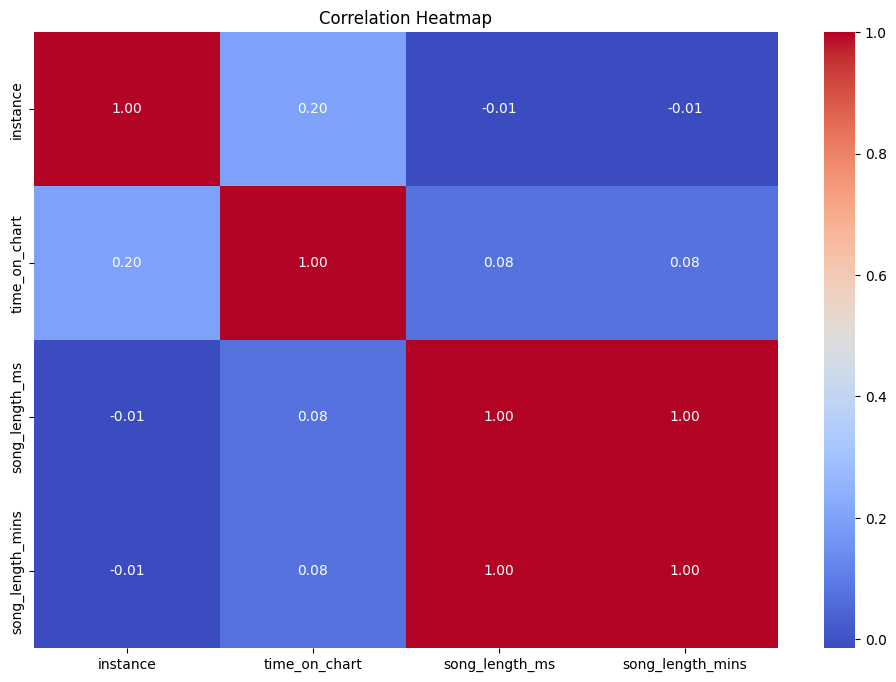

In [ ]:
correlation_matrix = unique_df.drop(columns=['song', 'performer', 'chart_date']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

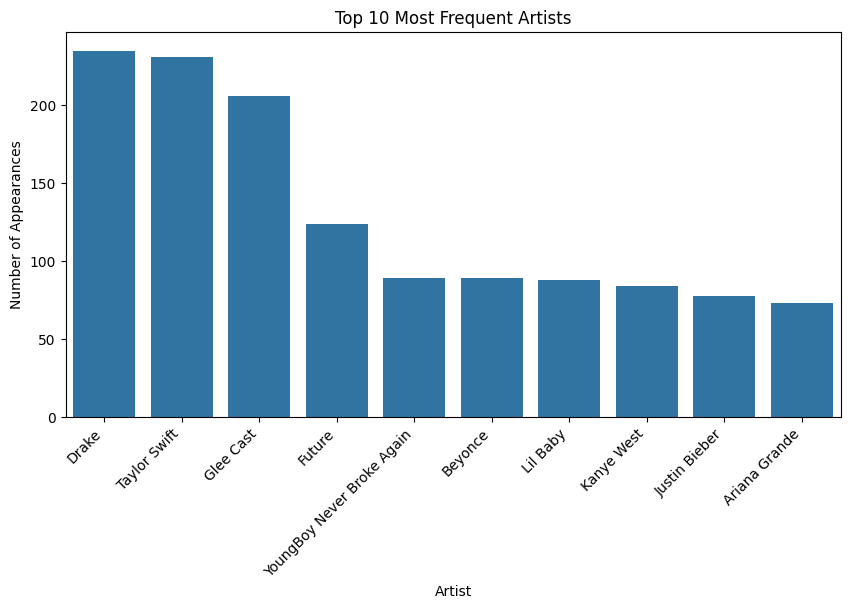

In [ ]:
# Plot the most frequent artists
artist_counts = unique_df['performer'].value_counts()
top_artists = artist_counts[:10]  # Top 10 artists

plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Filter the DataFrame to include only songs over 6 minutes
songs_over_6_minutes = unique_df[unique_df['song_length_mins'] > 6]

# Print the songs over 6 minutes
songs_over_6_minutes[['song', 'performer', 'song_length_mins']].head(20)

,song,performer,song_length_mins
549,Hate Me,Blue October,6.336667
797,Stupid Boy,Keith Urban,6.273100
799,What Goes Around...Comes Around,Justin Timberlake,7.476217
921,Earth Intruders,Bjork,6.230883
1014,LoveStoned,Justin Timberlake,7.405550
1175,Through The Fire And Flames,DragonForce,7.359333
1235,Falling Slowly,The Swell Season (Glen Hansard,6.543767
1252,I Will Possess Your Heart,Death Cab For Cutie,8.429550
1355,Never Would Have Made It,Marvin Sapp,6.918883
1425,The Day That Never Comes,Metallica,7.937767


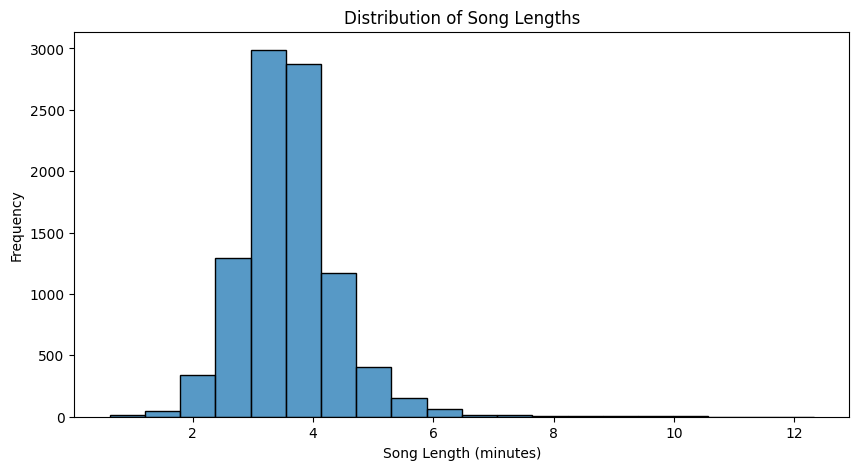

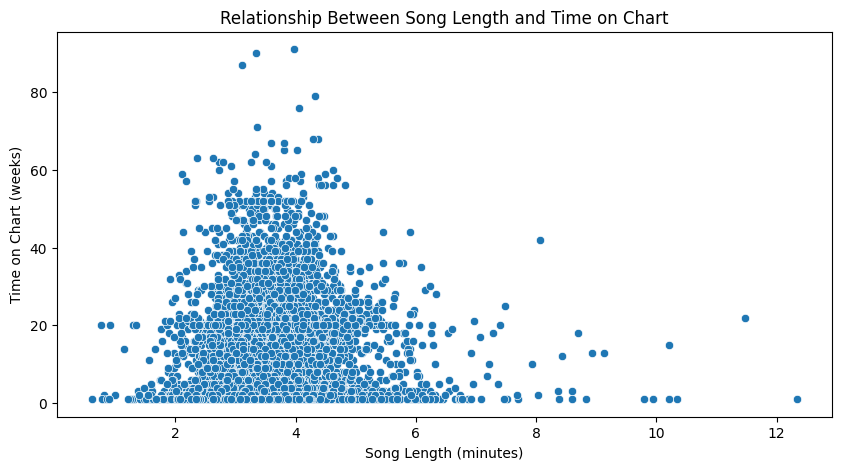

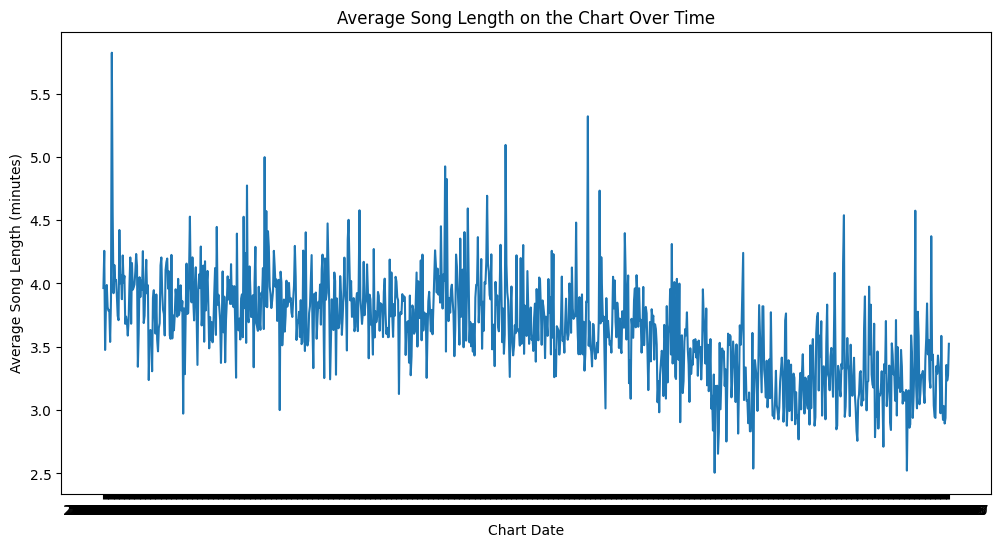

In [ ]:
# Plot the distribution of song lengths
plt.figure(figsize=(10, 5))
sns.histplot(unique_df['song_length_mins'], bins=20)
plt.title('Distribution of Song Lengths')
plt.xlabel('Song Length (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between song length and time on chart
plt.figure(figsize=(10, 5))
sns.scatterplot(x='song_length_mins', y='time_on_chart', data=unique_df)
plt.title('Relationship Between Song Length and Time on Chart')
plt.xlabel('Song Length (minutes)')
plt.ylabel('Time on Chart (weeks)')
plt.show()

# Plot the average song length over time
df_avg_length_over_time = unique_df.groupby('chart_date')['song_length_mins'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='chart_date', y='song_length_mins', data=df_avg_length_over_time)
plt.title('Average Song Length on the Chart Over Time')
plt.xlabel('Chart Date')
plt.ylabel('Average Song Length (minutes)')
plt.show()

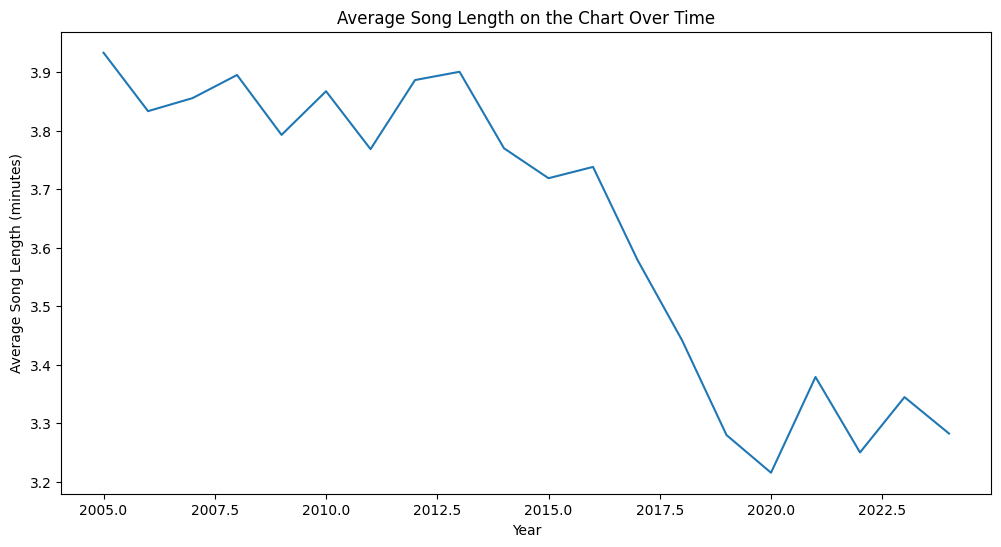

In [ ]:
# Extract the year from chart_date and calculate the average song length by year
unique_df['year'] = pd.to_datetime(unique_df['chart_date']).dt.year
df_avg_length_over_time = unique_df.groupby('year')['song_length_mins'].mean().reset_index()

# Plot the average song length over time by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='song_length_mins', data=df_avg_length_over_time)
plt.title('Average Song Length on the Chart Over Time')
plt.xlabel('Year')
plt.ylabel('Average Song Length (minutes)')
plt.show()


In [ ]:
import pandas as pd
#comparison of average song length pre and post 2016
unique_df['chart_date'] = pd.to_datetime(unique_df['chart_date'])

# Calculate the average song length before 2016
average_before_2016 = unique_df[unique_df['chart_date'] < '2016-01-01']['song_length_mins'].mean()

# Calculate the average song length after 2016
average_after_2016 = unique_df[unique_df['chart_date'] >= '2016-01-01']['song_length_mins'].mean()

print("Average song length before 2016 (mins):", average_before_2016)
print("Average song length after 2016 (mins):", average_after_2016)

Average song length before 2016 (mins): 3.835242200597711
Average song length after 2016 (mins): 3.37791672211825


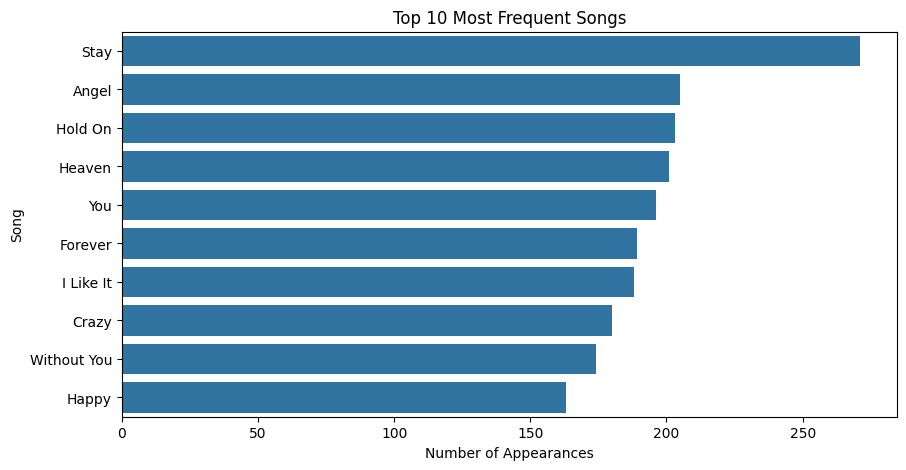

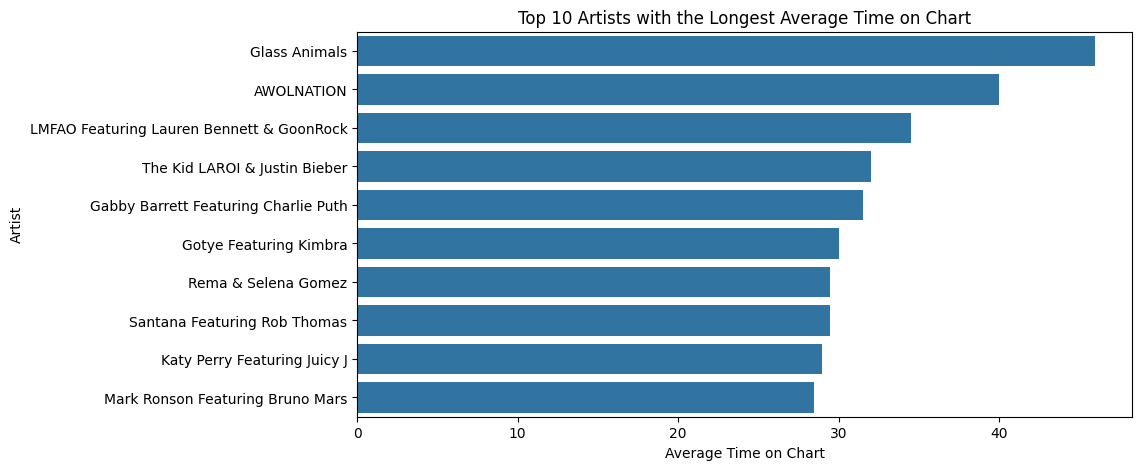

In [ ]:
# Plot the top 10 most frequent songs
song_counts = df['song'].value_counts()
top_songs = song_counts[:10]  # Top 10 songs

plt.figure(figsize=(10, 5))
sns.barplot(x=top_songs.values, y=top_songs.index)
plt.title('Top 10 Most Frequent Songs')
plt.xlabel('Number of Appearances')
plt.ylabel('Song')
plt.show()

# Plot the average time on chart per artist
df_avg_time_on_chart_per_artist = df.groupby('performer')['time_on_chart'].mean().reset_index()
df_avg_time_on_chart_per_artist = df_avg_time_on_chart_per_artist.sort_values('time_on_chart', ascending=False)
top_artists_by_time_on_chart = df_avg_time_on_chart_per_artist[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x='time_on_chart', y='performer', data=top_artists_by_time_on_chart)
plt.title('Top 10 Artists with the Longest Average Time on Chart')
plt.xlabel('Average Time on Chart')
plt.ylabel('Artist')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343195 entries, 0 to 343194
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chart_position     343195 non-null  int64  
 1   chart_date         343195 non-null  object 
 2   song               343195 non-null  object 
 3   performer          343195 non-null  object 
 4   song_id            343195 non-null  object 
 5   instance           343195 non-null  float64
 6   time_on_chart      343195 non-null  int64  
 7   consecutive_weeks  308706 non-null  float64
 8   previous_week      308706 non-null  float64
 9   peak_position      343195 non-null  int64  
 10  worst_position     343195 non-null  int64  
 11  chart_debut        343195 non-null  object 
 12  chart_url          343195 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 34.0+ MB


## Forecasting Analysis


Use of a T-test to provide a P-value comparing pre and post 2016 song length averages

In [ ]:
from scipy import stats

unique_df['chart_date'] = pd.to_datetime(unique_df['chart_date'])

# Split the data into two groups
before_2016 = unique_df[unique_df['chart_date'] < '2016-01-01']['song_length_mins']
after_2016 = unique_df[unique_df['chart_date'] >= '2016-01-01']['song_length_mins']

# Perform t-test
t_stat, p_value = stats.ttest_ind(before_2016, after_2016)

# Output results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 28.850300268492518
p-value: 1.965945543500352e-175


we can conclude that there is a signficant difference between pre and post 2016 song lengths (p-value= 1.97×10
−175) therefore we will use 2016-01-01 as a signficant changepoint in our data for the Prophet model

Prophet Model with 2016 Changepoint





INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0f97736/vff_1qz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0f97736/0tyswtdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4275', 'data', 'file=/tmp/tmpt0f97736/vff_1qz4.json', 'init=/tmp/tmpt0f97736/0tyswtdy.json', 'output', 'file=/tmp/tmpt0f97736/prophet_modeln4xt_s6_/prophet_model-20241029213820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:38:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:38:20 - cmdstanpy - ERROR - Chain [1] 

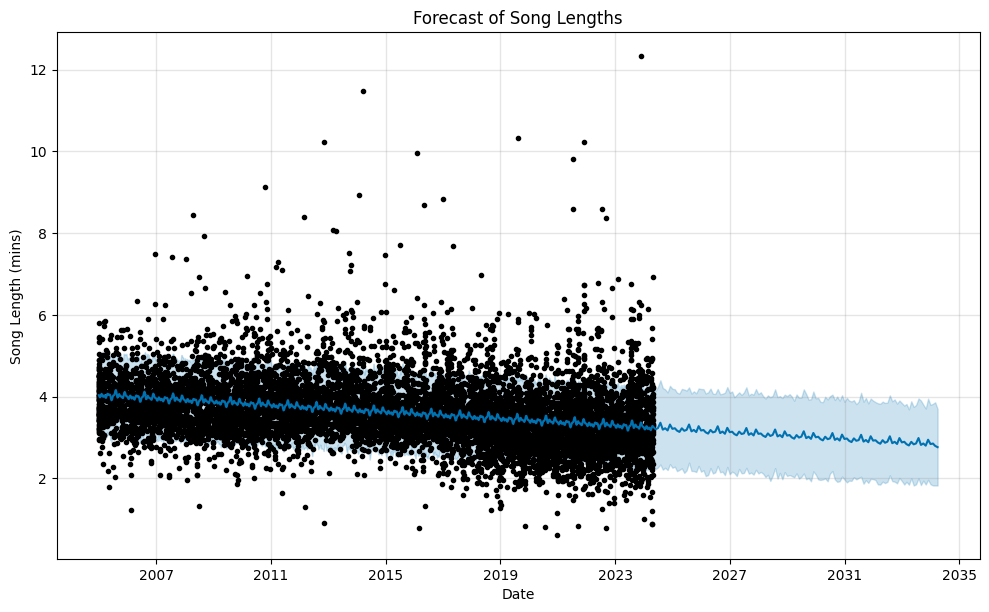

             ds      yhat  yhat_lower  yhat_upper
1008 2024-04-30  3.263316    2.311991    4.182279
1009 2024-05-31  3.200439    2.222277    4.132611
1010 2024-06-30  3.226509    2.264677    4.238144
1011 2024-07-31  3.358466    2.337199    4.397764
1012 2024-08-31  3.189414    2.210649    4.207906
...         ...       ...         ...         ...
1123 2033-11-30  2.942599    1.963073    3.947809
1124 2033-12-31  2.836441    1.853775    3.795355
1125 2034-01-31  2.849735    1.823637    3.821860
1126 2034-02-28  2.792163    1.823284    3.858869
1127 2034-03-31  2.761078    1.822608    3.698395

[120 rows x 4 columns]


In [ ]:
# Select only the required columns and rename them for Prophet
df_prophet = unique_df[['chart_date', 'song_length_mins']].copy()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for the target variable

# Ensure 'ds' is in datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

import pandas as pd

# Rename the columns for Prophet
unique_df['chart_date'] = pd.to_datetime(unique_df['chart_date'])
prophet_df = unique_df[['chart_date', 'song_length_mins']].rename(columns={'chart_date': 'ds', 'song_length_mins': 'y'})

# Instantiate the Prophet model with changepoint prior scale
#really low changepoint scale to be really sensitive to the 2016 changepoint so it only detects signficant shifts
from prophet import Prophet
model = Prophet(changepoints=['2016-01-01'], changepoint_prior_scale=0.0001)

# Fit the model to your data
model.fit(prophet_df)

# Create a dataframe to hold predictions for the next 60 months
future = model.make_future_dataframe(periods=120, freq='M')  # m is month and 60 for 5 years of data

# Predict future values
forecast = model.predict(future)

import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.title("Forecast of Song Lengths")
plt.xlabel("Date")
plt.ylabel("Song Length (mins)")
plt.show()

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(120))  # Shows the last 10 years of forecasted values

Prophet Model without 2016 Changepoint to compare

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0f97736/sc752l6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt0f97736/c1dpj_ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17602', 'data', 'file=/tmp/tmpt0f97736/sc752l6y.json', 'init=/tmp/tmpt0f97736/c1dpj_ln.json', 'output', 'file=/tmp/tmpt0f97736/prophet_model8kh24c_0/prophet_model-20241029214037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

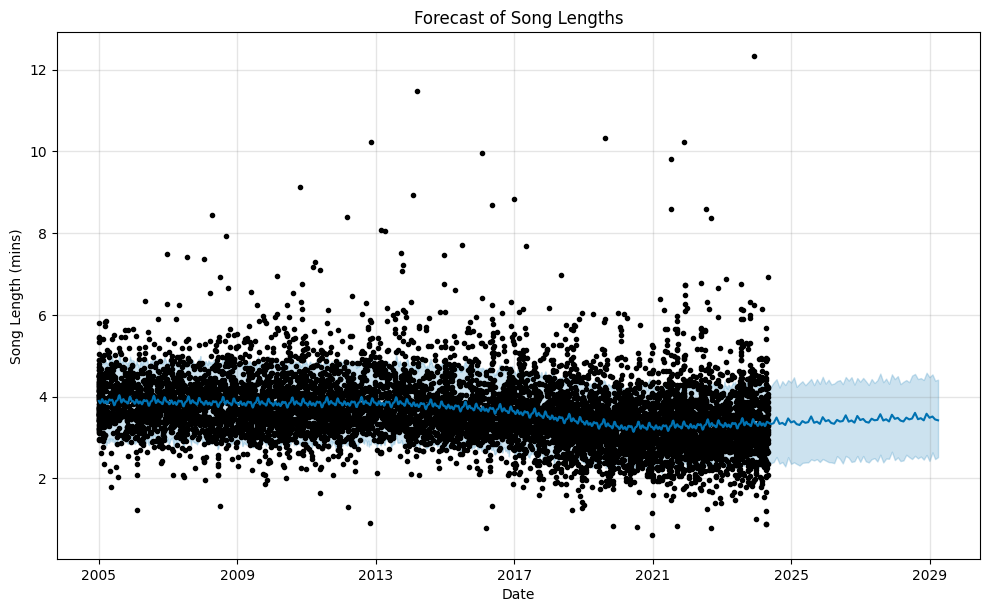

             ds      yhat  yhat_lower  yhat_upper
1008 2024-04-30  3.369056    2.449943    4.325992
1009 2024-05-31  3.325600    2.367261    4.234000
1010 2024-06-30  3.346320    2.393976    4.340473
1011 2024-07-31  3.486030    2.520700    4.423072
1012 2024-08-31  3.329923    2.357158    4.219916
1013 2024-09-30  3.354925    2.397317    4.376668
1014 2024-10-31  3.302026    2.289065    4.282088
1015 2024-11-30  3.464344    2.514393    4.401529
1016 2024-12-31  3.365522    2.351340    4.344005
1017 2025-01-31  3.396311    2.389245    4.470563
1018 2025-02-28  3.324205    2.350708    4.237400
1019 2025-03-31  3.303419    2.312077    4.314482
1020 2025-04-30  3.398409    2.376302    4.373705
1021 2025-05-31  3.356495    2.385291    4.276914
1022 2025-06-30  3.373687    2.388334    4.349704
1023 2025-07-31  3.513042    2.461735    4.430988
1024 2025-08-31  3.357427    2.435568    4.279078
1025 2025-09-30  3.384306    2.467519    4.425693
1026 2025-10-31  3.330941    2.397143    4.308547


In [ ]:
#Create and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

#Make future dataframe
future = model.make_future_dataframe(periods=60, freq='M')  # Forecasting for 5 years or 60 months

#Make predictions
forecast = model.predict(future)

#Visualize the forecast
model.plot(forecast)
plt.title("Forecast of Song Lengths")
plt.xlabel("Date")
plt.ylabel("Song Length (mins)")
plt.show()

#Examine the forecast data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60))

## Machine Learning!- Not using

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert 'chart_date' to datetime
unique_df['chart_date'] = pd.to_datetime(unique_df['chart_date'])

# Extract year, month, and day as separate features
unique_df['chart_year'] = unique_df['chart_date'].dt.year
unique_df['chart_month'] = unique_df['chart_date'].dt.month
unique_df['chart_day'] = unique_df['chart_date'].dt.day

# Encode categorical variables like 'song', 'performer', and 'instance'
label_encoder = LabelEncoder()
unique_df['song'] = label_encoder.fit_transform(unique_df['song'])
unique_df['performer'] = label_encoder.fit_transform(unique_df['performer'])
unique_df['instance'] = label_encoder.fit_transform(unique_df['instance'])

# Drop rows with any missing values (if necessary)
unique_df.dropna(inplace=True)

In [ ]:
# Create lag features and rolling averages
unique_df['lag_1'] = unique_df['time_on_chart'].shift(1)
unique_df['lag_7'] = unique_df['time_on_chart'].shift(7)  # 1-week lag
unique_df['rolling_mean_7'] = unique_df['time_on_chart'].rolling(window=7).mean()
unique_df['rolling_std_7'] = unique_df['time_on_chart'].rolling(window=7).std()

# Drop NaN values that arise from shifting and rolling calculations
unique_df.dropna(inplace=True)

In [ ]:
# Define features (X) and target (y)
X = unique_df[['chart_year', 'chart_month', 'chart_day', 'song', 'performer', 'instance', 'song_length_ms', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']]
y = unique_df['time_on_chart']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Fit models and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE = {mse:.4f}, R^2 = {r2:.4f}")

LinearRegression: MSE = 101.6386, R^2 = 0.2487
RandomForestRegressor: MSE = 101.9427, R^2 = 0.2464


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the data for LSTM (time steps = 1 since we're using lag features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
print(f"LSTM: MSE = {mse_lstm:.4f}, R^2 = {r2_lstm:.4f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 194.2379 - val_loss: 124.6241
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 122.9042 - val_loss: 118.6281
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 110.5883 - val_loss: 115.5930
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 111.7118 - val_loss: 112.8012
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 109.9956 - val_loss: 109.2664
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 100.1991 - val_loss: 104.7884
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 99.7869 - val_loss: 104.5723
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 99.5277 - val_loss: 104.2366
Epoch 9/20
 20/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 94.4497

KeyboardInterrupt: 

About 12 minute run

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [1, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV to find the best hyperparameters
# n_iter specifies the number of random combinations to try
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Train the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the optimized model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Optimized RandomForestRegressor (RandomizedSearchCV): MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}")

In [ ]:
# Plot predictions for a visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Random Forest Predictions', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predictions', alpha=0.7)
plt.plot(y_pred, label='Linear Regression Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs. Predicted Time on Chart')
plt.xlabel('Time')
plt.ylabel('Time on Chart')
plt.show()